# DCC-GARCH Model

> examine existence of contagion effects, possible changes in conditional correlation

> advantageous to measure correlation coefficients of the standardised residuals and so account for heteroscedasticity in a direct way.

> Instruction given in journal, The Contagion Effect from U.S. Stock Market to the Vietnamese and the Philippine Stock Markets: The Evidence of DCC – GARCH Model (Thao Phan Thi Dieu LE1, Hieu Luong Minh TRAN2)

GARCH (Generalised Autoregressive Conditional Heteroskedasticity)
금융 시계열 데이터의 변동성을 설명하는데 사용함.
과거의 변동성이 현재의 변동성에 영향을 줄 수 있다는 개념 기반, 과거의 변동성과 이전 오차를 사용해서 현재 변동성 추정.

GARCH(1,1)
MA, p = 1
AR, q = 1

DCC (Dynamic Conditional Correlation)
다른 금융 자산간의 상관관계 설명.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

warnings.filterwarnings("ignore")

%matplotlib inline


## Importing raw dataset

In [2]:
### import raw index(tradable future) data

index_raw = pd.read_csv('index_raw_data.csv', index_col=0)
index_raw.index = pd.to_datetime(index_raw.index)
index_raw

,SPX,NKY,KOSPI,HSI,TWSE,UKX,AS51
1992-05-29,415.35,18347.75,570.93,6080.15,4519.27,2707.60,1704.600
1992-06-01,417.30,18004.11,569.19,6056.00,4456.85,2697.60,1700.500
1992-06-02,413.50,18125.55,567.34,6059.39,4468.94,2705.90,1702.700
1992-06-03,414.59,18188.68,568.98,6037.37,4583.97,2680.90,1704.500
1992-06-04,413.26,17964.07,568.81,6035.80,4586.61,2681.90,1701.900
...,...,...,...,...,...,...,...
2022-11-30,4080.11,27968.99,2472.53,18597.23,14879.55,7573.05,7284.172
2022-12-01,4076.57,28226.08,2479.84,18736.44,15012.80,7558.49,7354.418
2022-12-02,4071.70,27777.90,2434.33,18675.35,14970.68,7556.23,7301.463
2022-12-05,3998.84,27820.40,2419.32,19518.29,14980.74,7567.54,7325.604


In [3]:
index_return = np.log(index_raw / index_raw.shift(1)).dropna()
index_return

,SPX,NKY,KOSPI,HSI,TWSE,UKX,AS51
1992-06-01,0.004684,-0.018907,-0.003052,-0.003980,-0.013908,-0.003700,-0.002408
1992-06-02,-0.009148,0.006722,-0.003256,0.000560,0.002709,0.003072,0.001293
1992-06-03,0.002633,0.003477,0.002887,-0.003641,0.025414,-0.009282,0.001057
1992-06-04,-0.003213,-0.012426,-0.000299,-0.000260,0.000576,0.000373,-0.001527
1992-06-05,0.000532,-0.009735,0.000685,0.000000,0.000000,-0.005009,-0.001294
...,...,...,...,...,...,...,...
2022-11-30,0.030479,-0.002102,0.015957,0.021334,0.011485,0.008094,0.004246
2022-12-01,-0.000868,0.009150,0.002952,0.007458,0.008915,-0.001924,0.009597
2022-12-02,-0.001195,-0.016006,-0.018522,-0.003266,-0.002810,-0.000299,-0.007226
2022-12-05,-0.018056,0.001529,-0.006185,0.044148,0.000672,0.001496,0.003301


### Descriptive Statistic

In [4]:
index_return.describe()

,SPX,NKY,KOSPI,HSI,TWSE,UKX,AS51
count,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000,7688.000000
mean,0.000293,0.000054,0.000186,0.000151,0.000154,0.000133,0.000189
std,0.011715,0.014412,0.016145,0.015797,0.013921,0.011191,0.009880
min,-0.127652,-0.121110,-0.161154,-0.147347,-0.126043,-0.115124,-0.102596
25%,-0.004471,-0.006915,-0.006415,-0.006824,-0.005824,-0.005084,-0.004548
50%,0.000582,0.000000,0.000000,0.000000,0.000000,0.000257,0.000341
75%,0.005685,0.007375,0.007283,0.007610,0.006758,0.005734,0.005420
max,0.109572,0.132346,0.112844,0.172471,0.085206,0.093843,0.067655


In [5]:
for i,j in index_raw.iteritems():
    print(i+" kurtosis:",index_raw[i].kurtosis(),"skewness:",index_raw[i].skew())

SPX kurtosis: 1.2719833105057439 skewness: 1.3313804413475783
NKY kurtosis: -0.3798697656406045 skewness: 0.3856865686151834
KOSPI kurtosis: -0.9189409950373917 skewness: 0.32088950850867015
HSI kurtosis: -1.1763395987285923 skewness: 0.0516175600086761
TWSE kurtosis: 2.151892105028311 skewness: 1.3333133548997462
UKX kurtosis: -0.7310800263188453 skewness: -0.48503128126457573
AS51 kurtosis: -1.0951949751328272 skewness: 0.057025148907070146


### Starionarity test on returns

In [6]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    
#ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [7]:
for i,j in index_return.iteritems():
    print("KPSS Test: "+i+" Log Returns")
    kpss_test(j)

KPSS Test: SPX Log Returns
KPSS Statistic: 0.09107472347352431
p-value: 0.1
num lags: 21
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Test: NKY Log Returns
KPSS Statistic: 0.17887434023571444
p-value: 0.1
num lags: 17
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Test: KOSPI Log Returns
KPSS Statistic: 0.04024606261180391
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Test: HSI Log Returns
KPSS Statistic: 0.11045039371249554
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Test: TWSE Log Returns
KPSS Statistic: 0.03881062307783431
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Test: UK

/Users/sangkyunam/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/sangkyunam/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/sangkyunam/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/sangkyunam/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: 

In [8]:
for i,j in index_return.iteritems():
    print("ADF Test: "+i+" Index Level")
    adf_test(j)

ADF Test: SPX Index Level
Results of Dickey-Fuller Test:
Test Statistic                -1.611603e+01
p-value                        4.954850e-29
#Lags Used                     3.300000e+01
Number of Observations Used    7.654000e+03
Critical Value (1%)           -3.431205e+00
Critical Value (5%)           -2.861918e+00
Critical Value (10%)          -2.566971e+00
dtype: float64
ADF Test: NKY Index Level
Results of Dickey-Fuller Test:
Test Statistic                  -52.580249
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    7685.000000
Critical Value (1%)              -3.431201
Critical Value (5%)              -2.861916
Critical Value (10%)             -2.566970
dtype: float64
ADF Test: KOSPI Index Level
Results of Dickey-Fuller Test:
Test Statistic                -1.508393e+01
p-value                        8.377300e-28
#Lags Used                     3.000000e+01
Number of Observations Used    7.657000e+03
Critical Val

### Visualisation

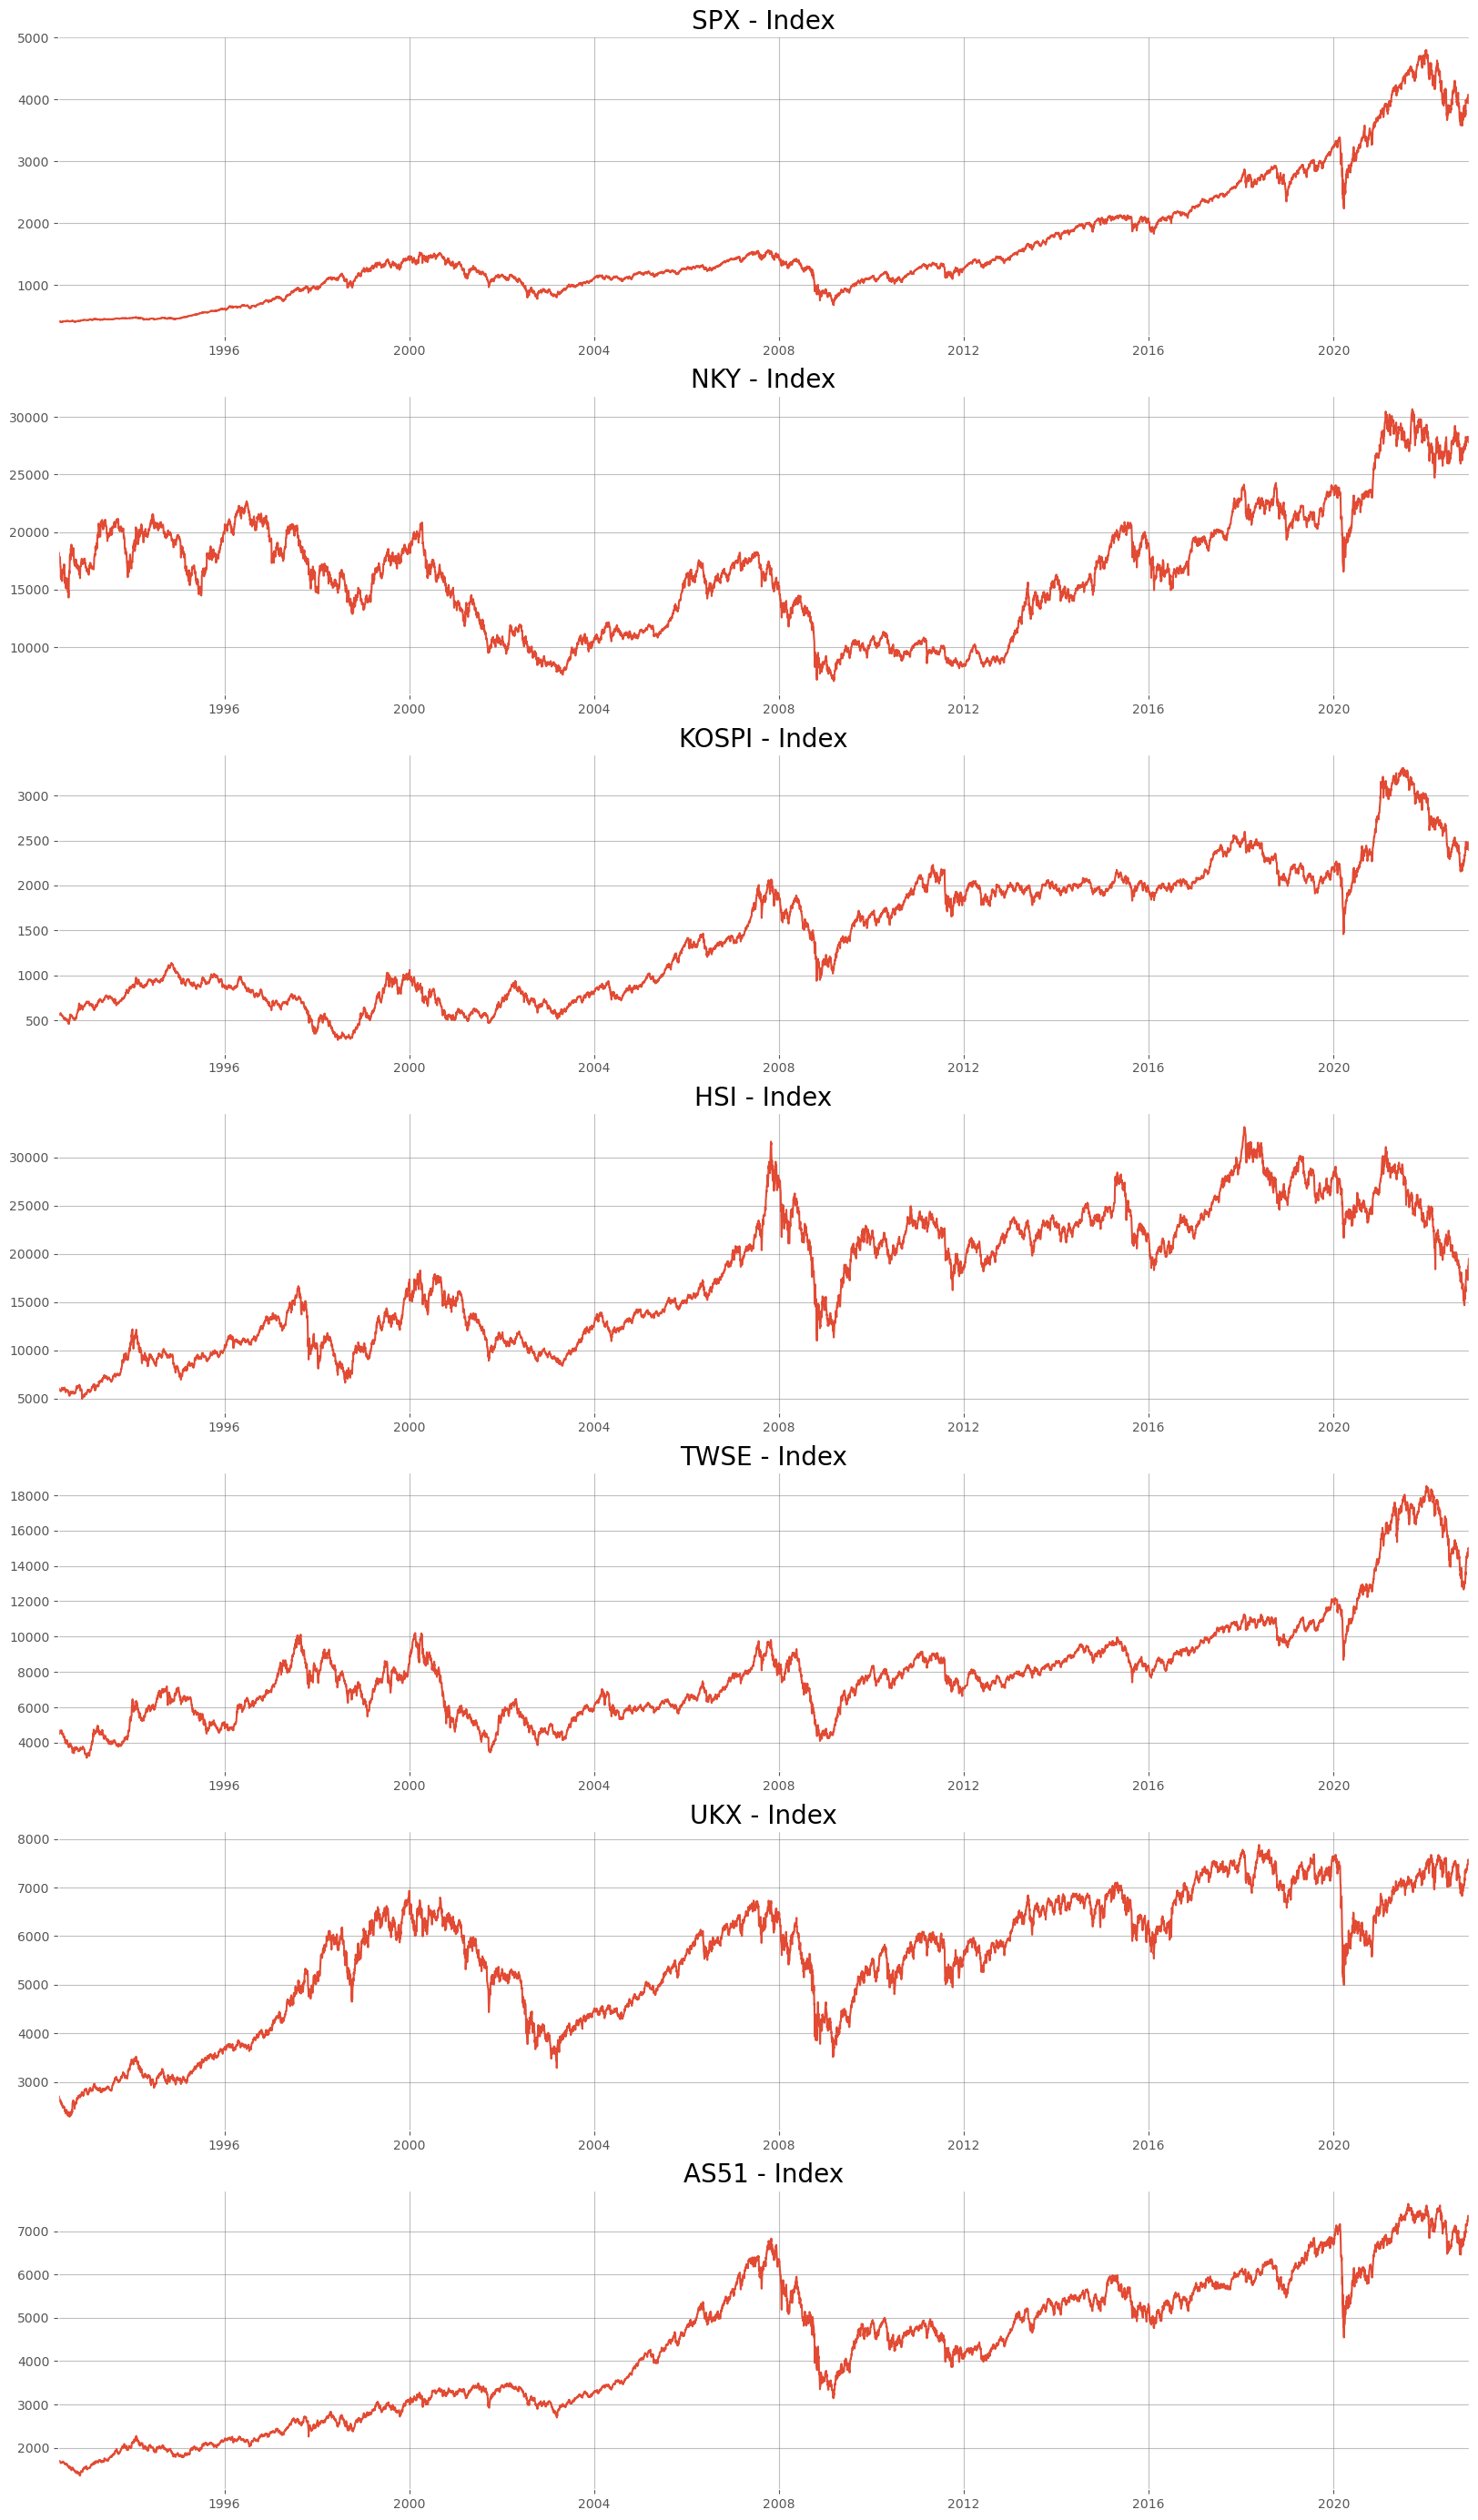

In [9]:
fig, axs = plt.subplots(7,1, figsize = (20,35))

for i in range(7):
    axs[i].plot(index_raw.iloc[:,i])
    axs[i].grid(alpha=0.5)
    axs[i].margins(x=0)
    axs[i].set_title("{} - Index".format(index_raw.columns[i]),size=20)

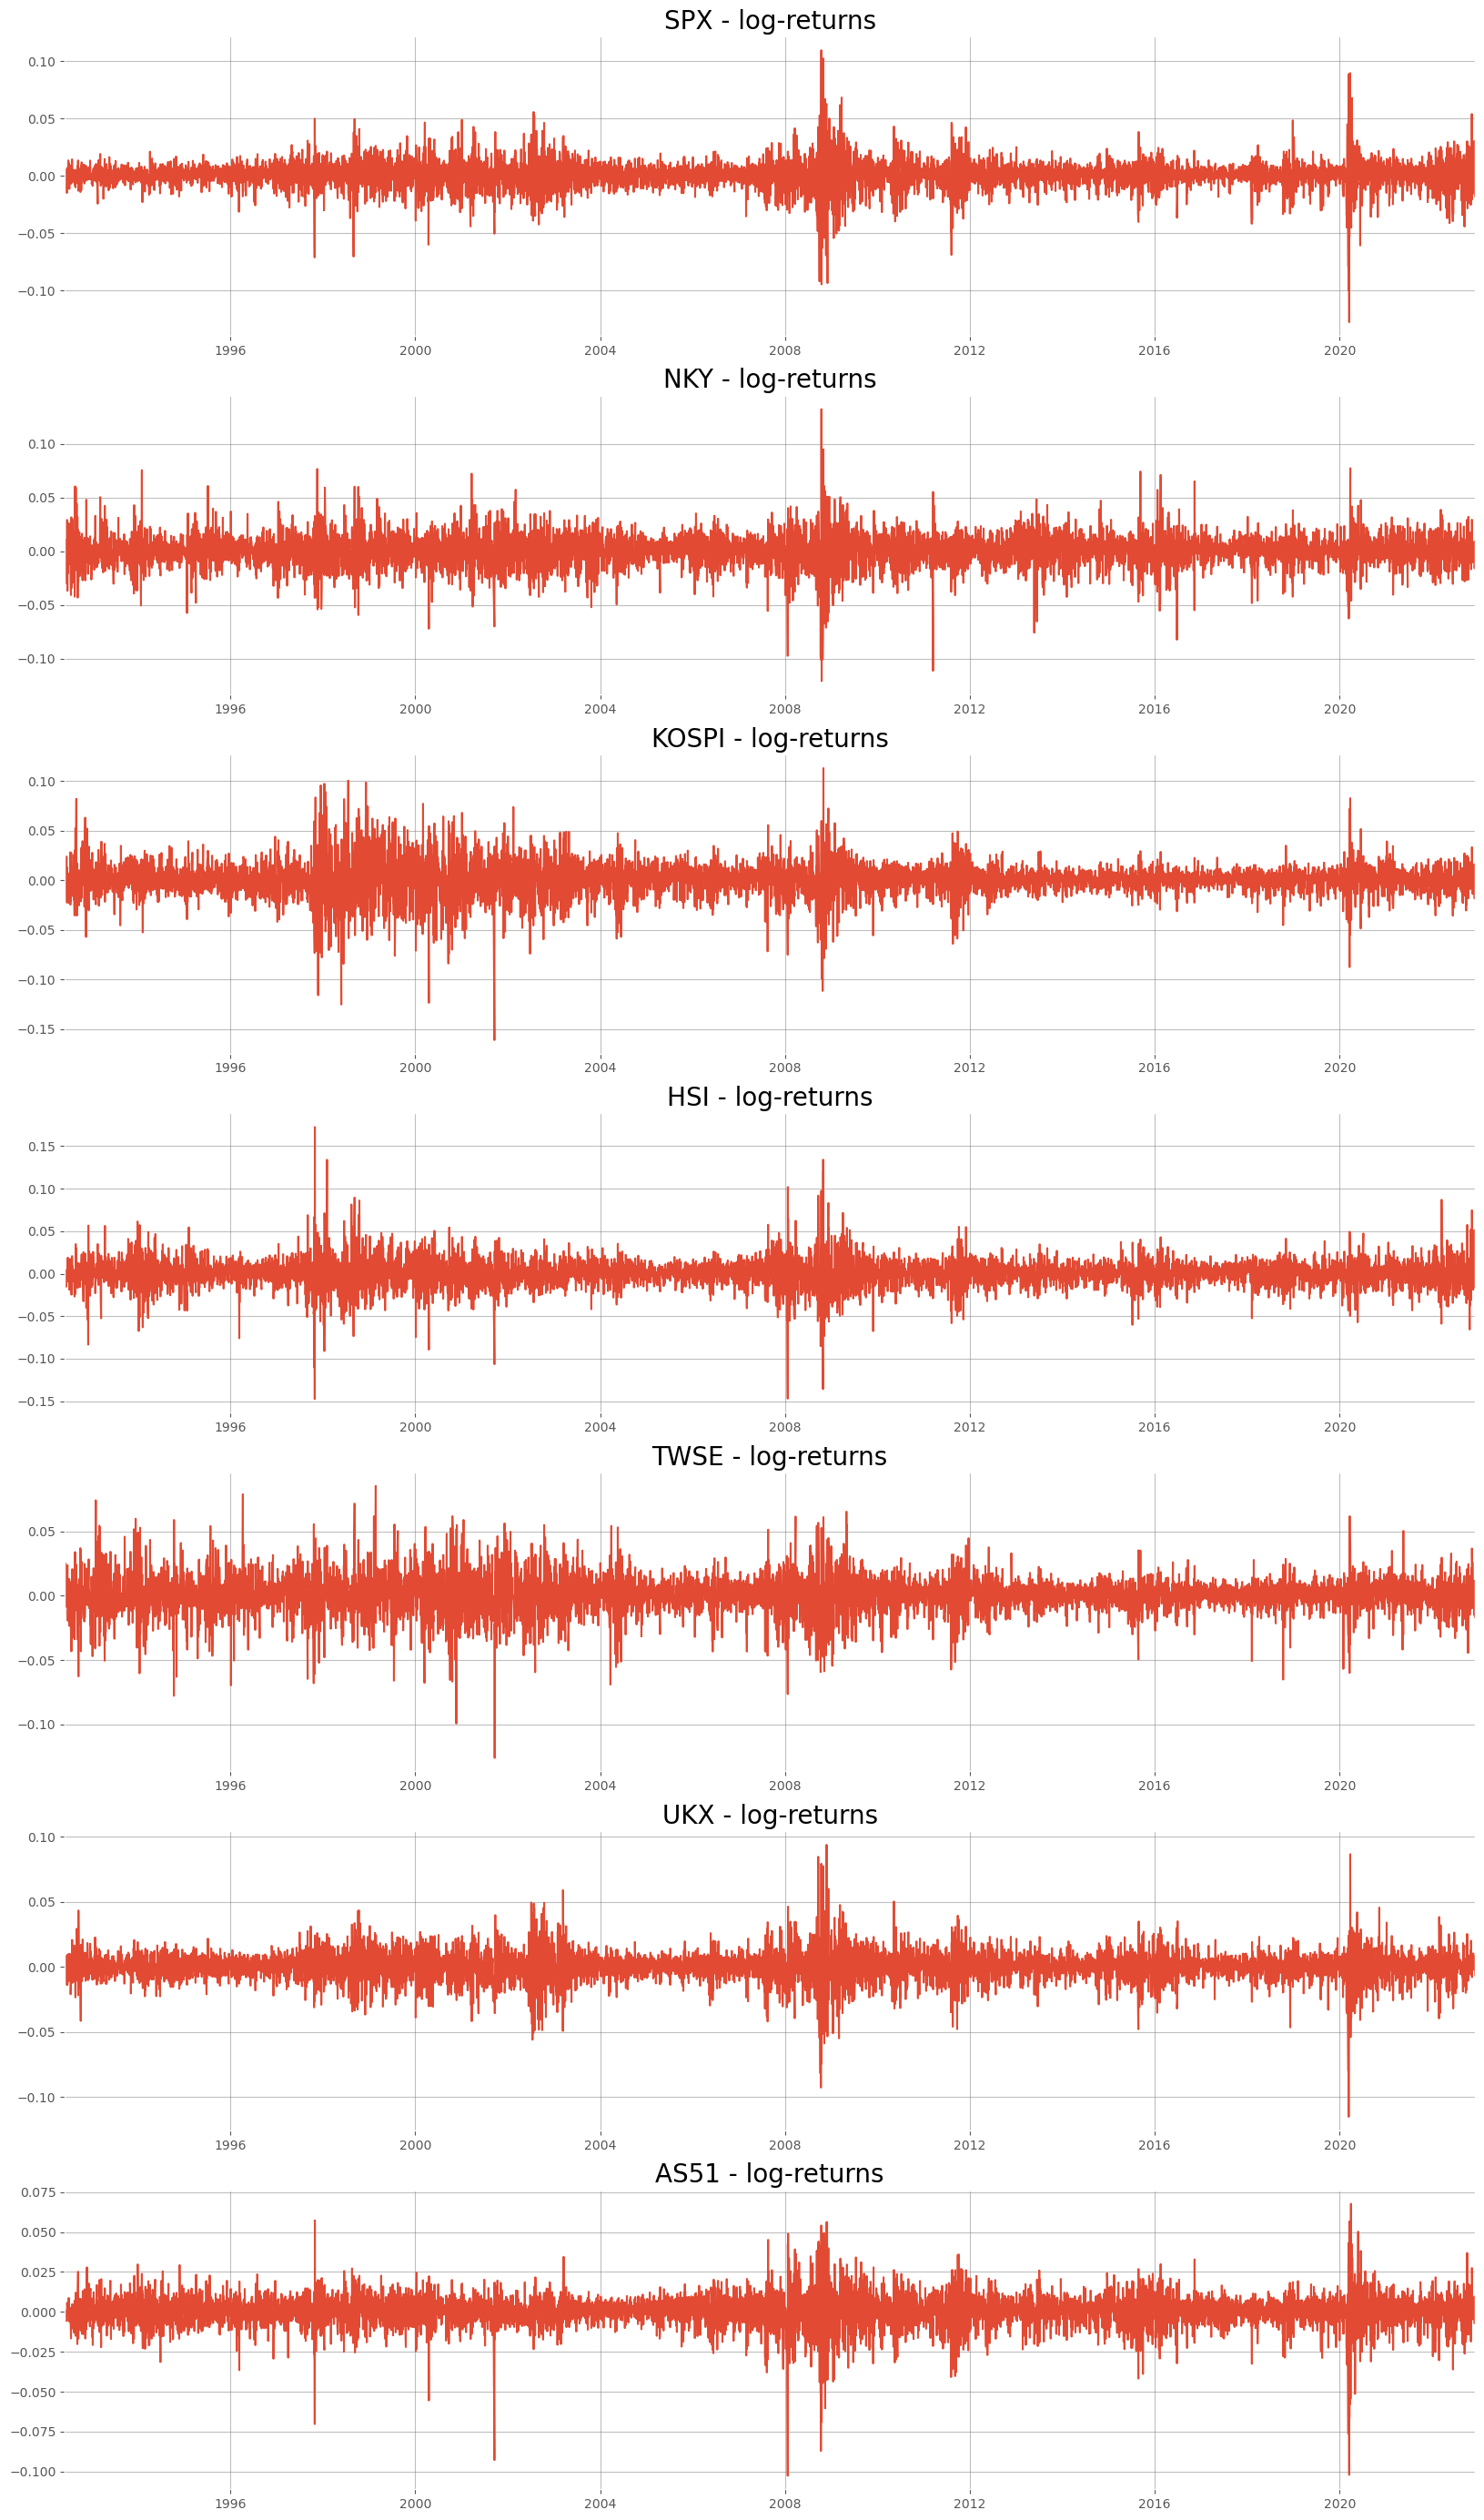

In [10]:
fig, axs = plt.subplots(7,1, figsize = (20,35))

for i in range(7):
    axs[i].plot(index_return.iloc[:,i])
    axs[i].grid(alpha=0.5)
    axs[i].margins(x=0)
    axs[i].set_title("{} - log-returns".format(index_return.columns[i]),size=20)

## Importing R results - Prediction

In [11]:
### following csv is generated from DCC GARCH forecast using R

D_t_sq = pd.read_csv('dt_df.csv', index_col=0) # Diagonal matrix of conditional standard deviations for return series
R_t = pd.read_csv('rt_df.csv', index_col=0) # N x N symmetric dynamic correlations matrix

D_t_sq.index = pd.to_datetime(D_t_sq.index)
R_t.index = pd.to_datetime(R_t.index)

D_t = np.sqrt(D_t_sq)


In [31]:
D_t.head(5)
# First row
# h11^0.5, h22^0.5, h33^0.5, h44^0.5, h55^0.5, h66^0.5

# eg) h11 = conditional covaraicne between asset 1 and 1

,SPX,NKY,KOSPI,HSI,TWSE,UKX,AS51
2021-12-09,0.011341,0.010599,0.012939,0.012950,0.008005,0.011365,0.006103
2021-12-10,0.011048,0.010375,0.012498,0.012626,0.007834,0.010863,0.005919
2021-12-13,0.010831,0.009978,0.012157,0.012314,0.007764,0.011011,0.005723
2021-12-14,0.010608,0.009584,0.011704,0.012050,0.007725,0.010506,0.005712
2021-12-15,0.011213,0.009292,0.011303,0.011781,0.007685,0.010116,0.005688


In [32]:
R_t.head(5)
# First row
# p11, p12, p13, p14, p15, p16 (dcc)

# eg) p12 = conditional correlation between asset 1 and 2

,SPX,NKY,KOSPI,HSI,TWSE,UKX,AS51
2021-12-09,1,0.203688,0.182046,0.209464,0.191677,0.481856,0.255575
2021-12-10,1,0.201442,0.180998,0.207643,0.190262,0.480820,0.254378
2021-12-13,1,0.200418,0.182214,0.208905,0.192033,0.482482,0.254064
2021-12-14,1,0.200317,0.181980,0.210312,0.193957,0.481957,0.250857
2021-12-15,1,0.201675,0.182694,0.206191,0.197358,0.477771,0.245122


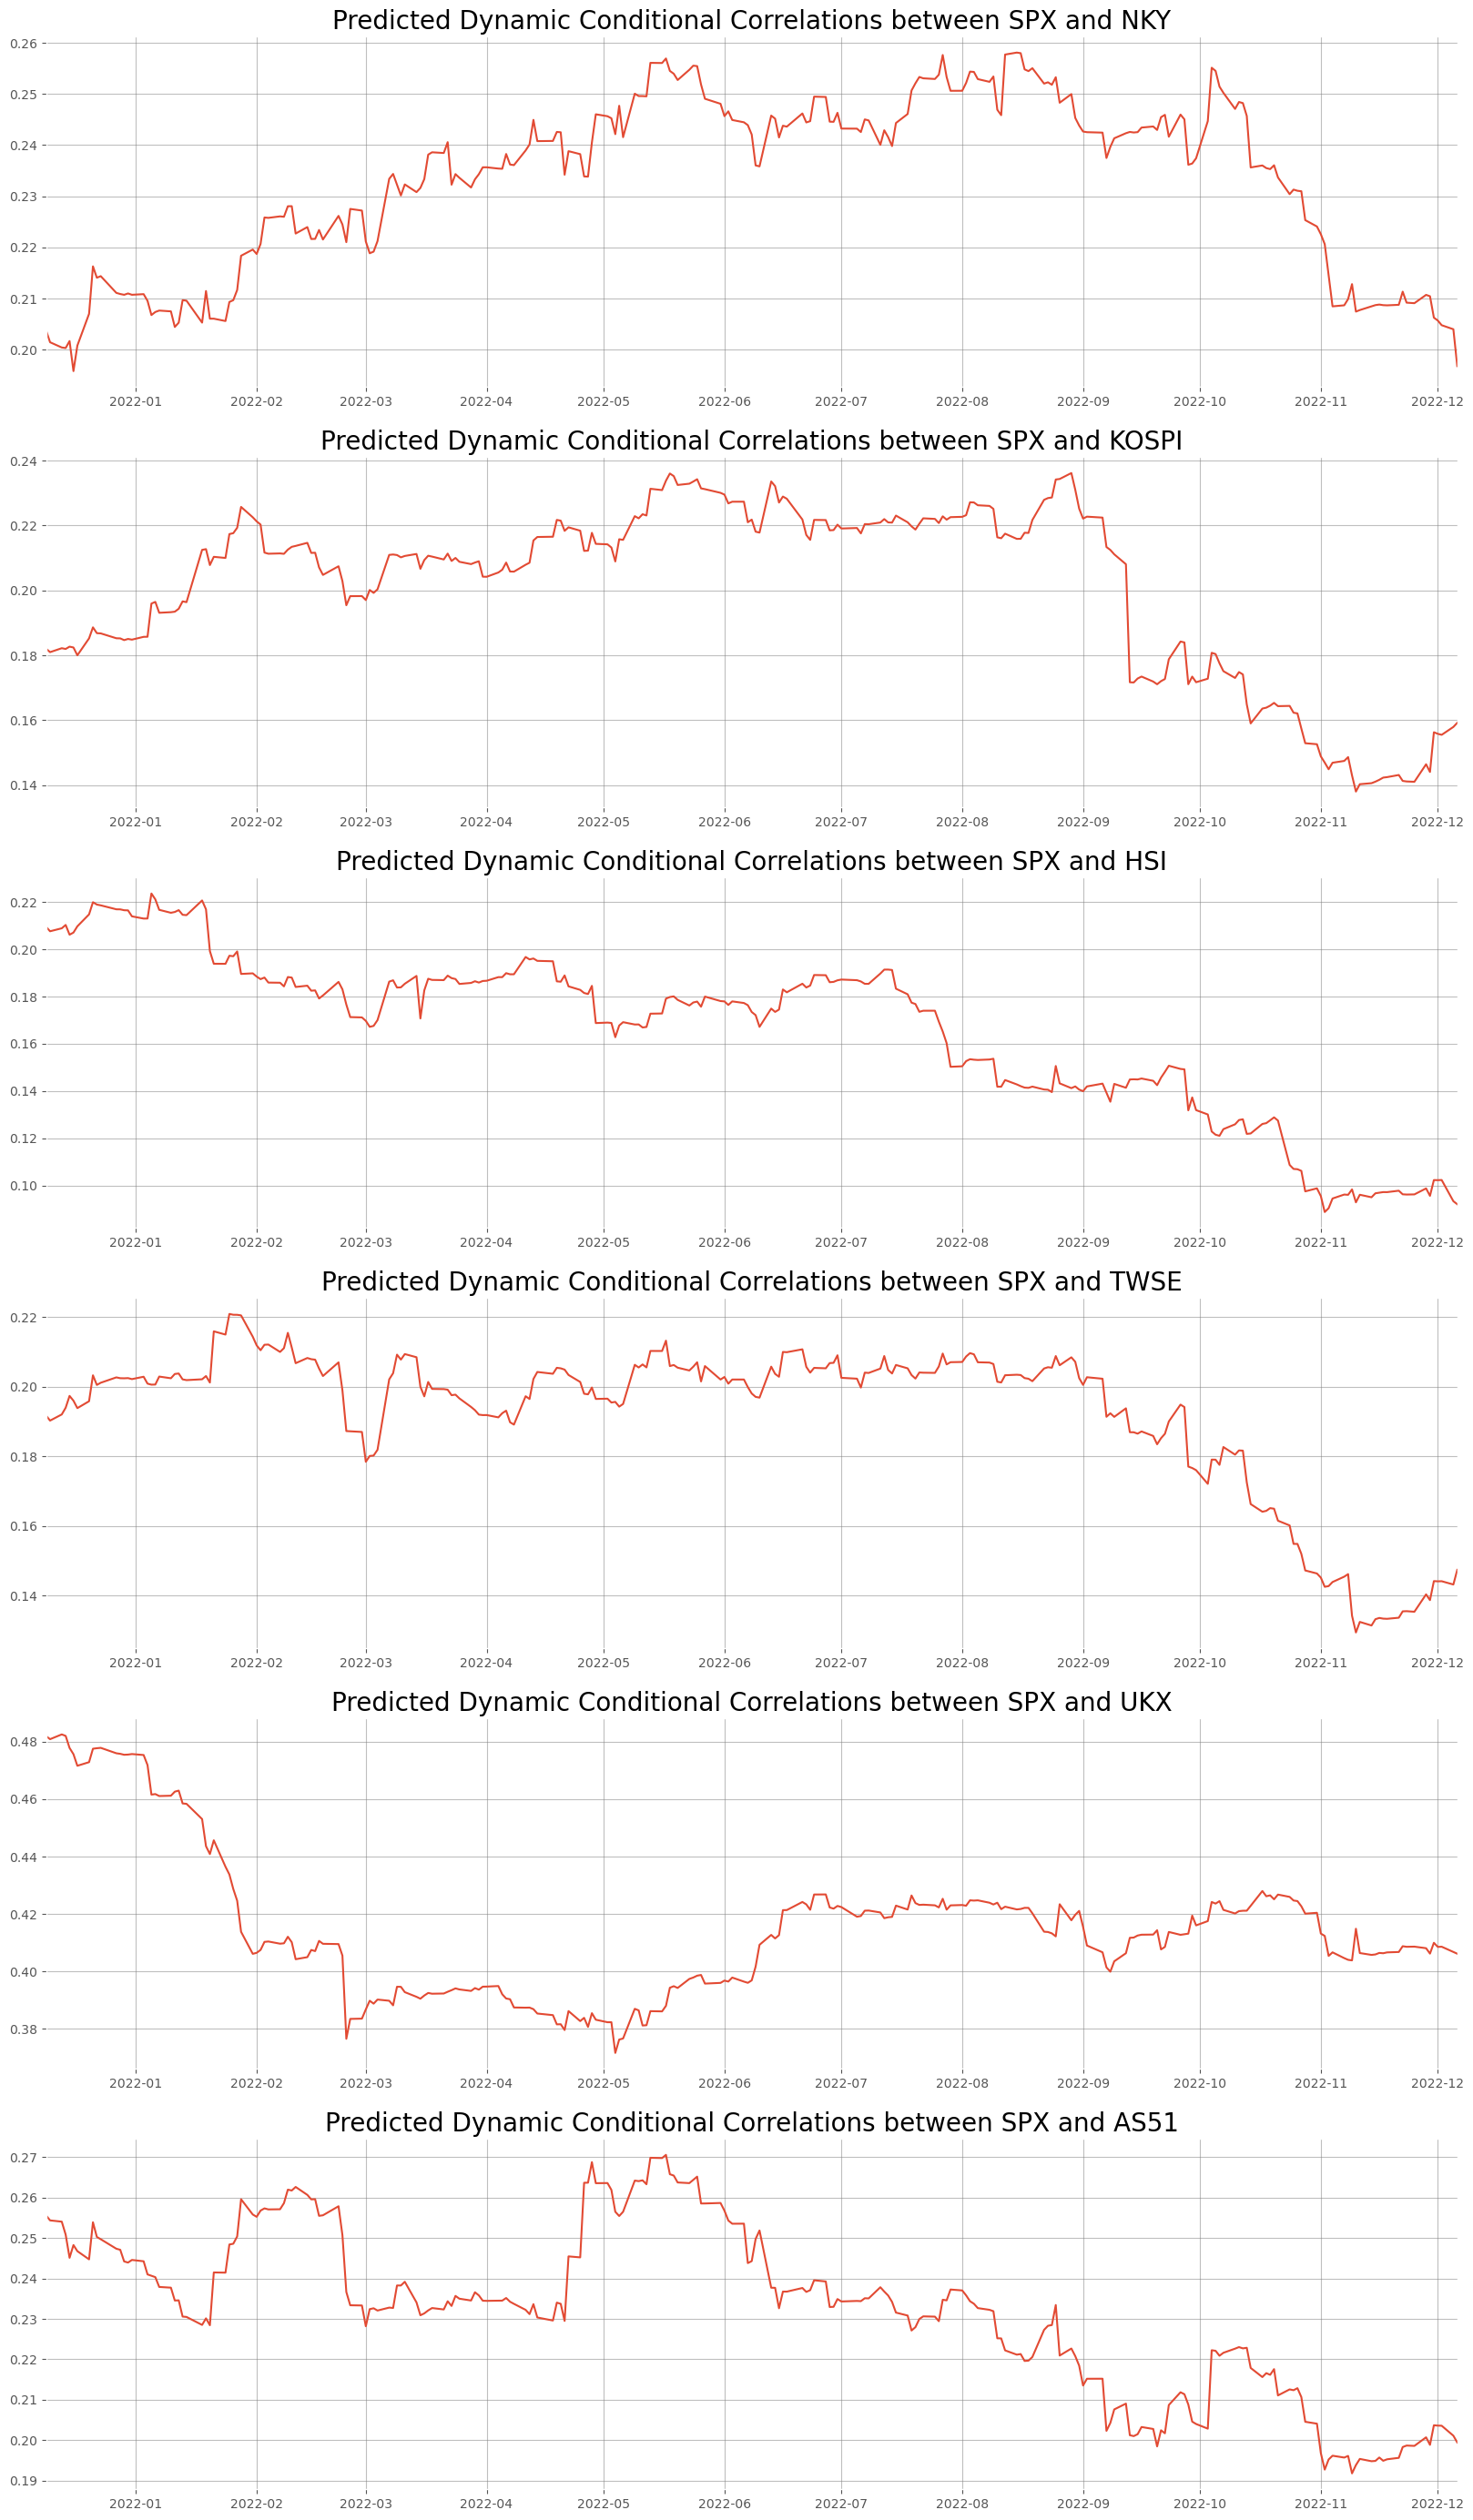

In [14]:
### PLOT DCC for forecasted period

fig, axs = plt.subplots(6, 1, figsize = (20,35))

for i in range(6):
    axs[i].plot(R_t.iloc[:,i+1])
    axs[i].grid(alpha=0.5)
    axs[i].margins(x=0)
    axs[i].set_title("Predicted Dynamic Conditional Correlations between SPX and {}".format(R_t.columns[i+1]),size=20)

## Portfolio [Hedge Ratio] Computation

In [15]:
## Beta (Hedge ratio)

# ex)   B12 = h12 / h22, and h12 = h11^0.5 * h22^0.5 * p12
# ex)   B13 = h13 / h33, and h13 = h11^0.5 * h33^0.5 * p13

# thus) B12 = (h11^0.5 * h22^0.5 * p12) / h22
# thus) B13 = (h11^0.5 * h33^0.5 * p13) / h33

# h11 col name = D_t.columns[0]
# h22 col name = D_t.columns[1]
# p12 col name = R_t.columns[1]

results_beta = []
col_list_beta = []

for i in range(1, len(D_t.columns)):
    # given a formula
    # B = (a * b * c) / d
    a = D_t[D_t.columns[0]] 
    b = D_t[D_t.columns[i]] 
    c = R_t[R_t.columns[i]] 
    d = b**2                
    B = (a * b * c) / d
    
    results_beta.append(B)
    col = "B1"+str(i+1)
    col_list_beta.append(col)
    
    results_beta_df = pd.DataFrame(results_beta).T
    results_beta_df.columns = col_list_beta
    
results_beta_df

,B12,B13,B14,B15,B16,B17
2021-12-09,0.217949,0.159571,0.183441,0.271578,0.480834,0.474930
2021-12-10,0.214512,0.160000,0.181694,0.268321,0.489022,0.474830
2021-12-13,0.217551,0.162341,0.183744,0.267891,0.474605,0.480843
2021-12-14,0.221727,0.164948,0.185145,0.266357,0.486636,0.465854
2021-12-15,0.243379,0.181238,0.196259,0.287981,0.529589,0.483214
...,...,...,...,...,...,...
2022-11-30,0.443287,0.233301,0.061538,0.190221,0.717253,0.531718
2022-12-01,0.414795,0.221155,0.060233,0.184533,0.658523,0.517078
2022-12-02,0.344544,0.194318,0.059141,0.179035,0.648010,0.488098
2022-12-05,0.367833,0.209382,0.051828,0.190385,0.698867,0.514228


In [16]:
results_beta_df_copy = results_beta_df.copy()
results_beta_df_copy.columns = ["SPX/NKY", 'SPX/KOSPI', 'SPX/HSI', 'SPX/TWSE', 'SPX/UKX', 'SPX/AS51']
results_beta_df_copy.describe()

# example interpretation
# SPX/NKY = 0.322288 (mean)
# [$1 long in S&P500(US)] can be hedged for [$0.322 short in Nikkei(JPN)] in avg during sample period

# cheapest hedge in avg during out of sample period = (SPX/HSI)

,SPX/NKY,SPX/KOSPI,SPX/HSI,SPX/TWSE,SPX/UKX,SPX/AS51
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.322288,0.287206,0.148249,0.271931,0.610231,0.446949
std,0.090158,0.086520,0.047504,0.070198,0.127101,0.097076
min,0.151754,0.156625,0.046695,0.144736,0.278110,0.221163
25%,0.242879,0.222586,0.119688,0.209861,0.529842,0.369867
50%,0.325912,0.270852,0.158061,0.268692,0.602994,0.458722
75%,0.383808,0.326331,0.183668,0.322198,0.697276,0.499430
max,0.517815,0.626320,0.233111,0.448740,0.958445,0.733884


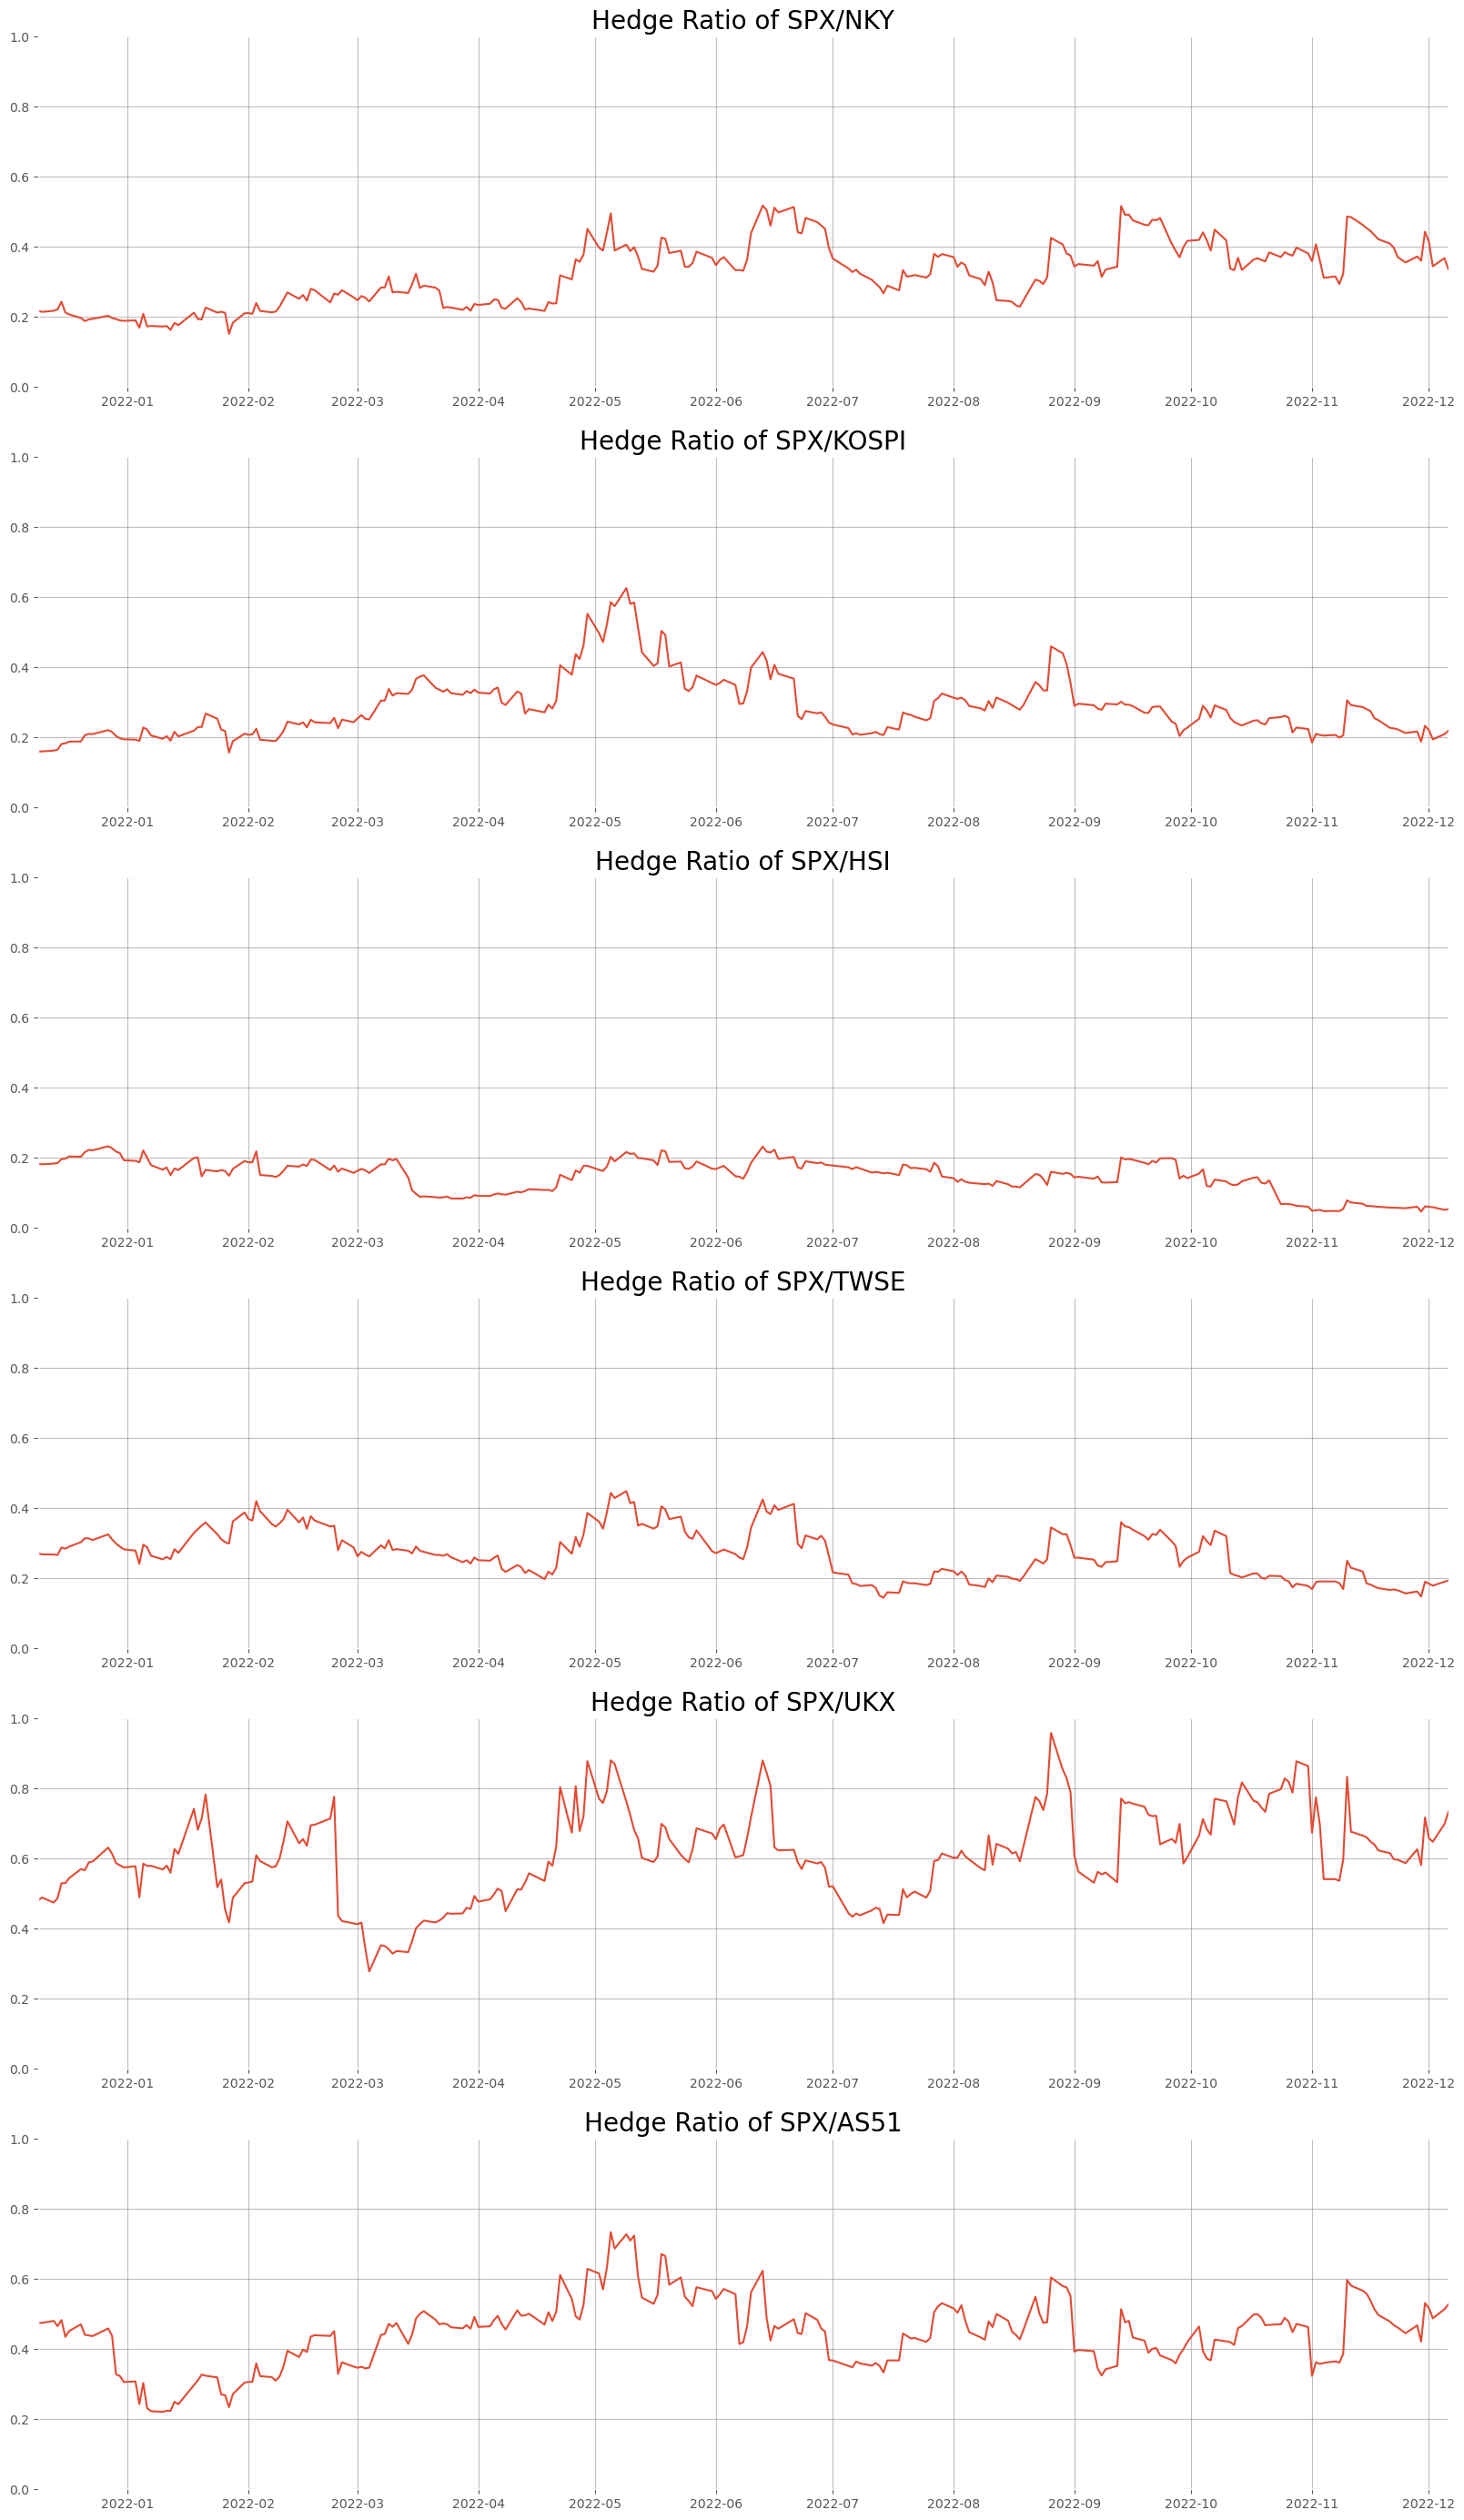

In [17]:
fig, axs = plt.subplots(6, 1, figsize = (20,35))
# fig.tight_layout(pad=10.0)

for i in range(6):
    axs[i].plot(results_beta_df_copy.iloc[:,i])
    axs[i].grid(alpha=0.5)
    axs[i].margins(x=0)
    axs[i].set_ylim(0.0,1.0)
    axs[i].set_title("Hedge Ratio of {}".format(results_beta_df_copy.columns[i]),size=20)

<AxesSubplot: >

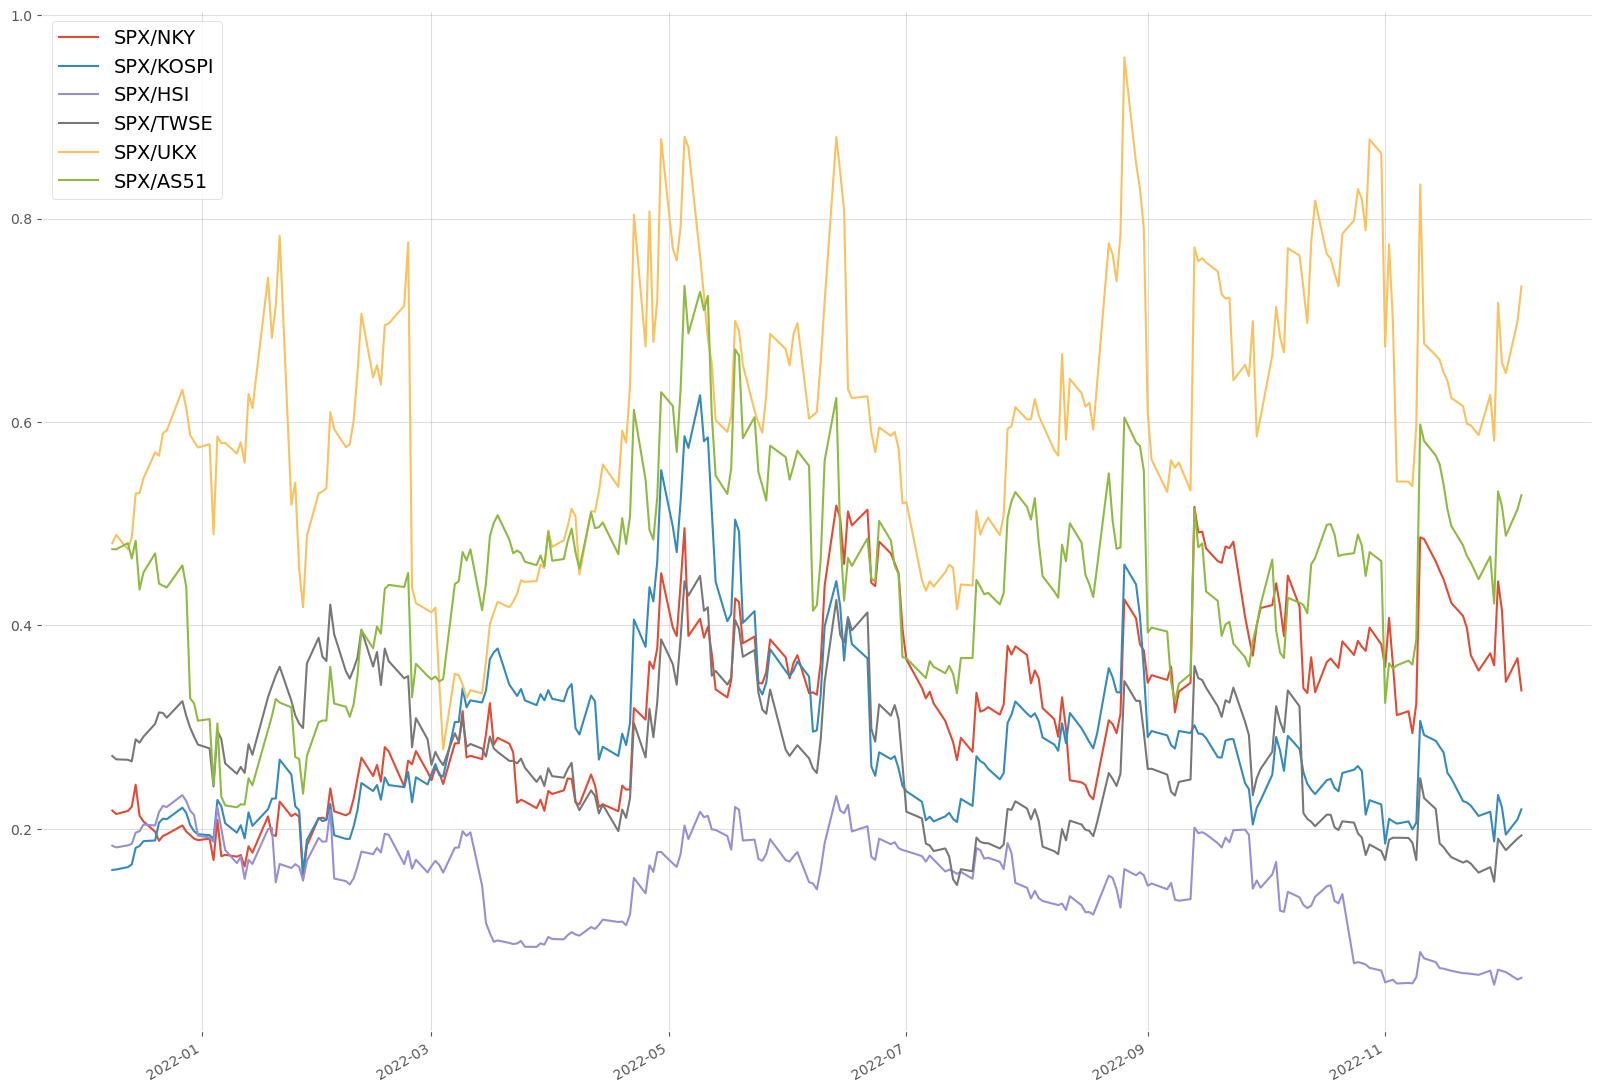

In [18]:
results_beta_df_copy.plot(figsize=(20,15))

# These hedge ratio is SPX agsint others
# You can describe how they behaved in the sample period

## Portfolio [Weights] Computation

In [19]:
## Portfolio weights

# ex)   W12 = h22 - h12 / h11 - 2(h12) + h22, and 
# 
# h12 = h11^0.5 * h22^0.5 * p12

# thus) W12 = h22 - (h11^0.5 * h22^0.5 * p12) / h11 - 2(h11^0.5 * h22^0.5 * p12) + h22

# h11 col name = D_t.columns[0]
# h22 col name = D_t.columns[1]
# p12 col name = R_t.columns[1]

results_weights = []
col_list_weights = []

for i in range(1, len(D_t.columns)):
    # given a formula
    # W = (b - c) / a - 2(c) + b
    a = D_t[D_t.columns[0]]    
    b = D_t[D_t.columns[i]] 
    c = (a**0.5) * (b**0.5) * R_t[R_t.columns[i]]
    W = (b - c) / a - (2*c) + b

    results_weights.append(W)
    col = "W1" + str(i+1)
    col_list_weights.append(col)
    
    results_weights_df = pd.DataFrame(results_weights).T
    results_weights_df.columns = col_list_weights
    
# data conditioning
results_weights_df[col_list_weights] = np.where(results_weights_df[col_list_weights] < 0, 0, 
                                                results_weights_df[col_list_weights])
results_weights_df[col_list_weights] = np.where(results_weights_df[col_list_weights] > 1, 1, 
                                                results_weights_df[col_list_weights])
    
results_weights_df 

,W12,W13,W14,W15,W16,W17
2021-12-09,0.743787,0.954929,0.925906,0.549111,0.520182,0.352499
2021-12-10,0.749923,0.946975,0.928566,0.553163,0.506786,0.351342
2021-12-13,0.734695,0.937348,0.921673,0.558489,0.530600,0.345418
2021-12-14,0.718586,0.919765,0.919077,0.566887,0.511081,0.356212
2021-12-15,0.650237,0.831794,0.846303,0.525956,0.448298,0.334463
...,...,...,...,...,...,...
2022-11-30,0.327480,0.548593,1.000000,0.640229,0.260880,0.259063
2022-12-01,0.354086,0.580388,1.000000,0.661217,0.298269,0.268043
2022-12-02,0.440342,0.668493,1.000000,0.683216,0.305842,0.287754
2022-12-05,0.406273,0.624138,1.000000,0.635074,0.271163,0.267338


In [20]:
results_weights_df_copy = results_weights_df.copy()
results_weights_df_copy.columns = ["SPX/NKY", 'SPX/KOSPI', 'SPX/HSI', 'SPX/TWSE', 'SPX/UKX', 'SPX/AS51']
results_weights_df_copy.describe()

results_weights_df_copy.describe()

# example interpretation
# SPX/NKY = 0.579582 (mean)
# For $1 portfolio [$0.579 invested in S&P500(US)] and [$1 - $0.579 invested in Nikkei(JPN)]
# in avg during out of sample period


,SPX/NKY,SPX/KOSPI,SPX/HSI,SPX/TWSE,SPX/UKX,SPX/AS51
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.579582,0.574278,0.887175,0.584130,0.364042,0.379219
std,0.183914,0.155344,0.114887,0.154588,0.126494,0.123213
min,0.294270,0.224867,0.605670,0.313211,0.158488,0.198344
25%,0.433047,0.470432,0.811866,0.461048,0.272839,0.302310
50%,0.536795,0.558970,0.906187,0.563393,0.342553,0.345485
75%,0.733549,0.673244,1.000000,0.667563,0.420023,0.414672
max,1.000000,1.000000,1.000000,1.000000,0.947318,0.833703


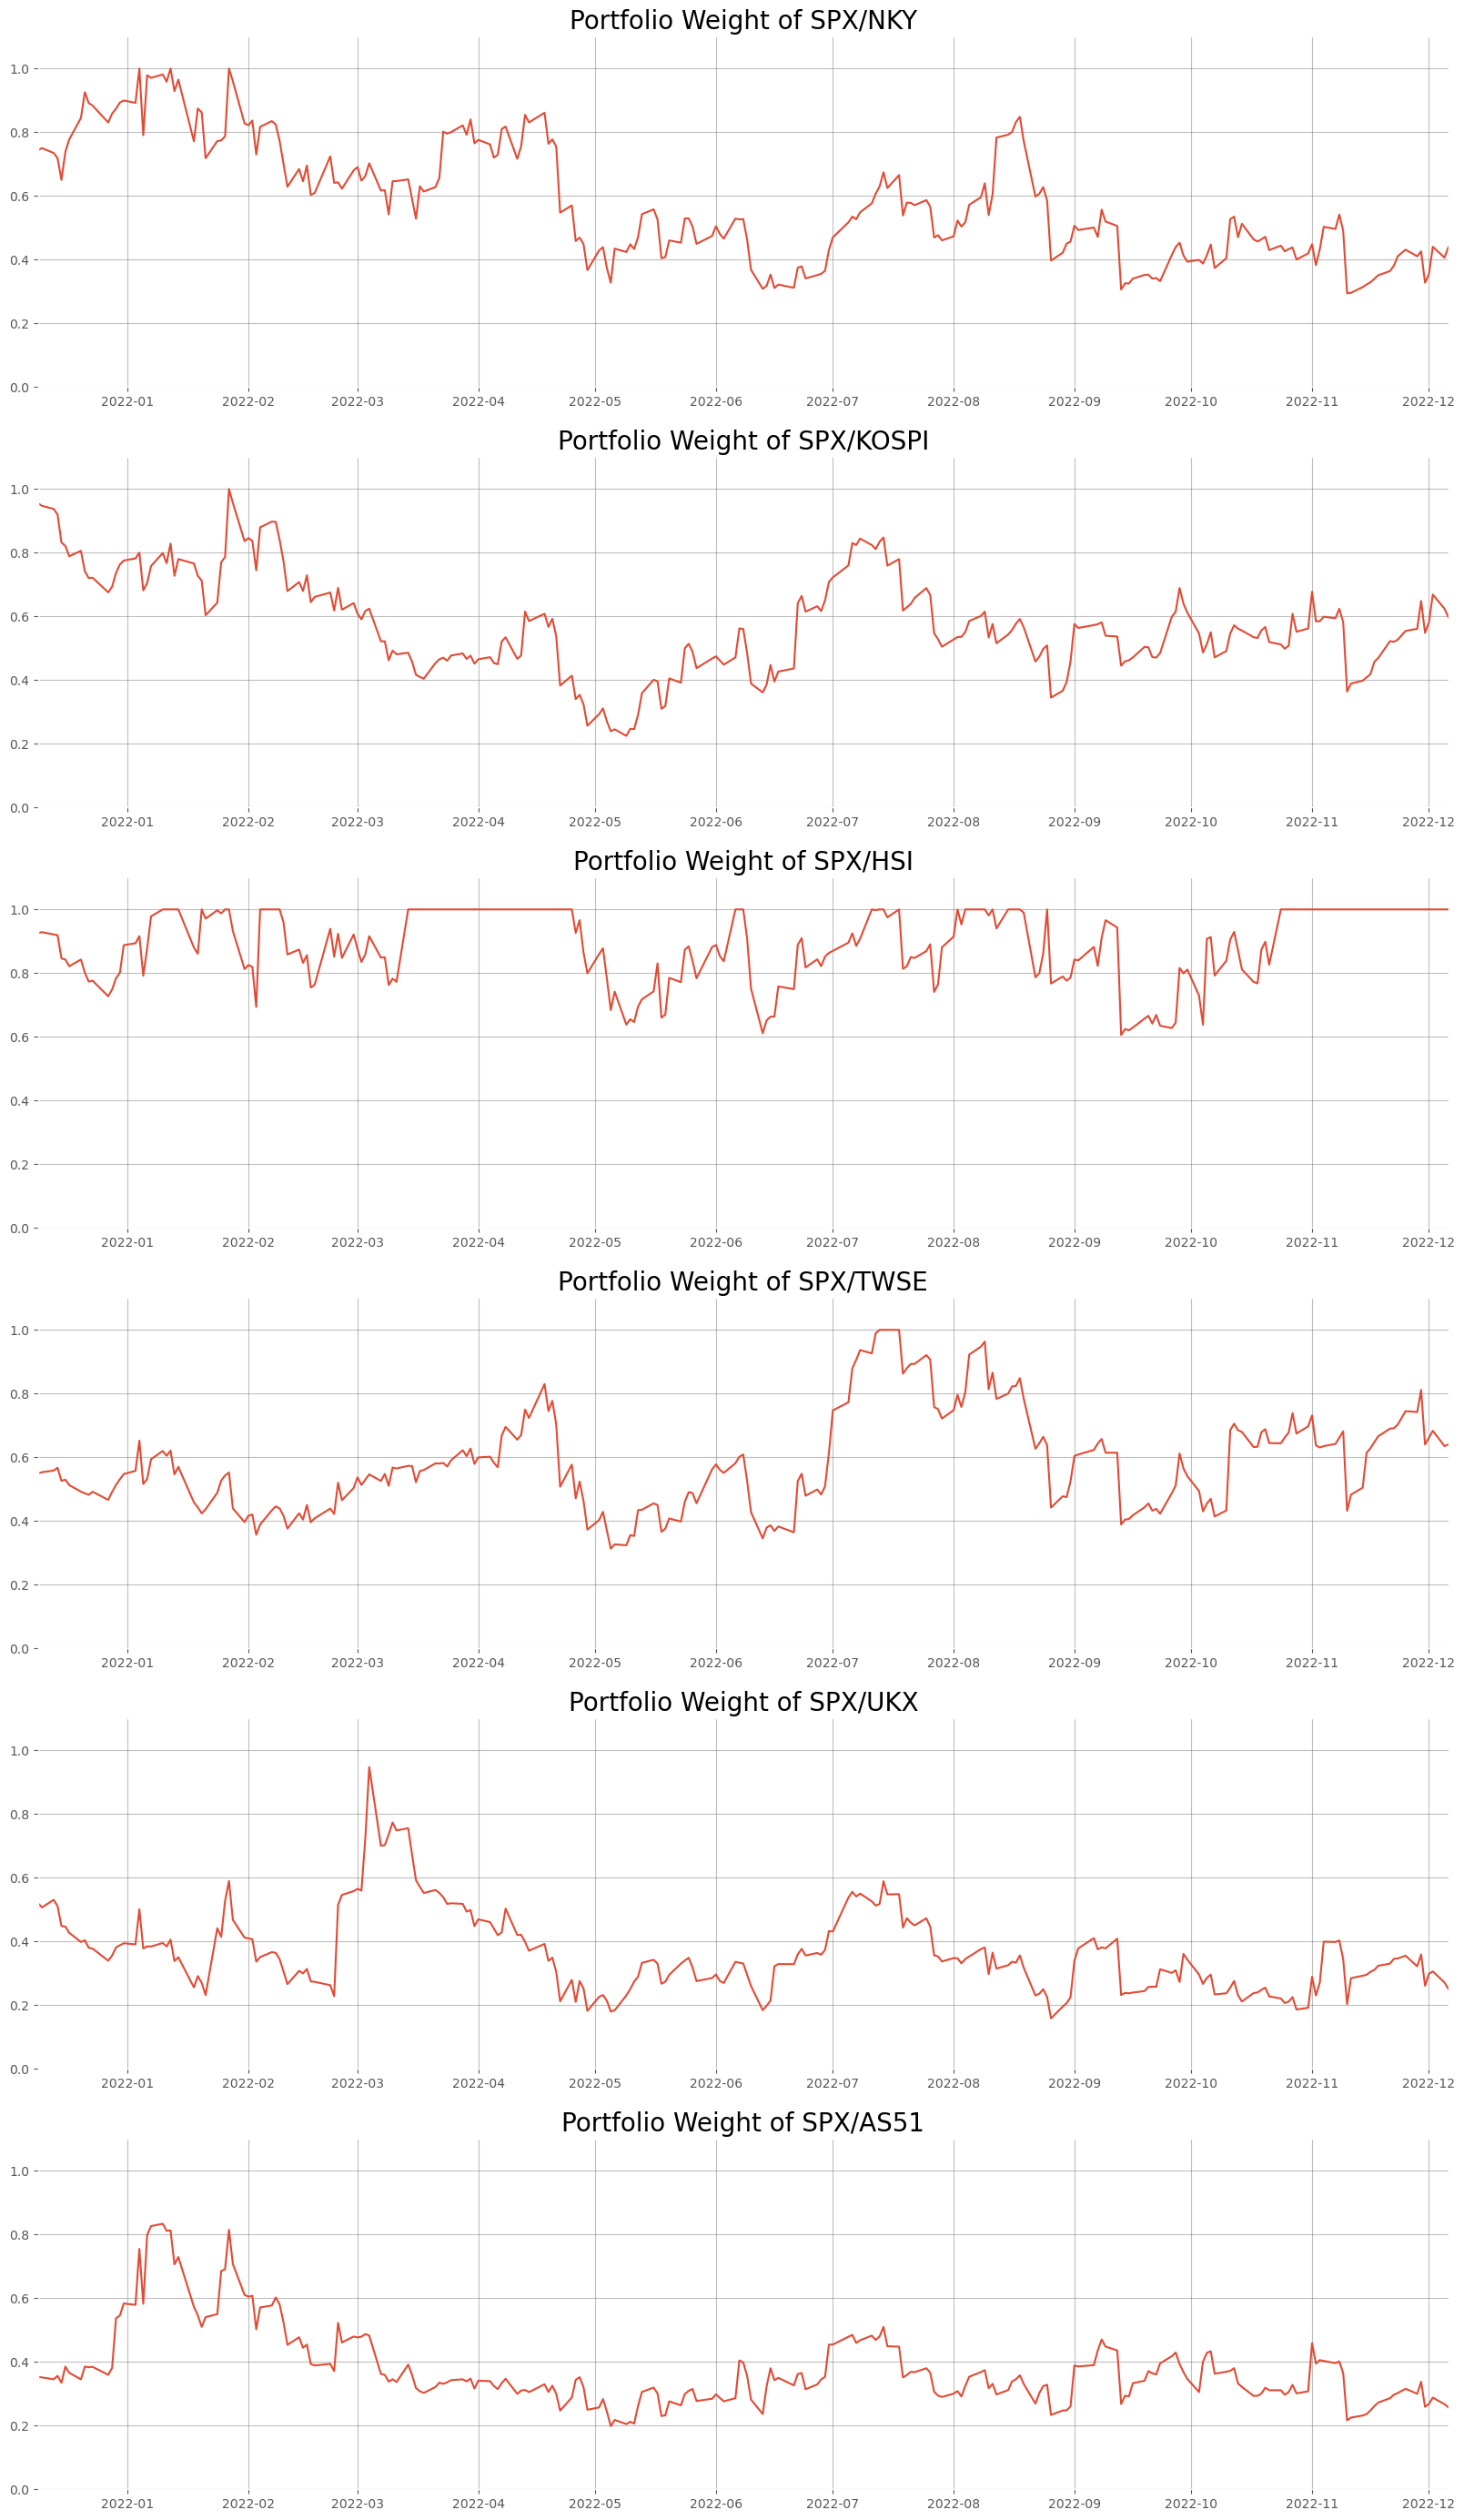

In [21]:
fig, axs = plt.subplots(6, 1, figsize = (20,35))
# fig.tight_layout(pad=10.0)

for i in range(6):
    axs[i].plot(results_weights_df_copy.iloc[:,i])
    axs[i].grid(alpha=0.5)
    axs[i].margins(x=0)
    axs[i].set_ylim(0.0,1.1)
    axs[i].set_title("Portfolio Weight of {}".format(results_weights_df_copy.columns[i]),size=20)

<AxesSubplot: >

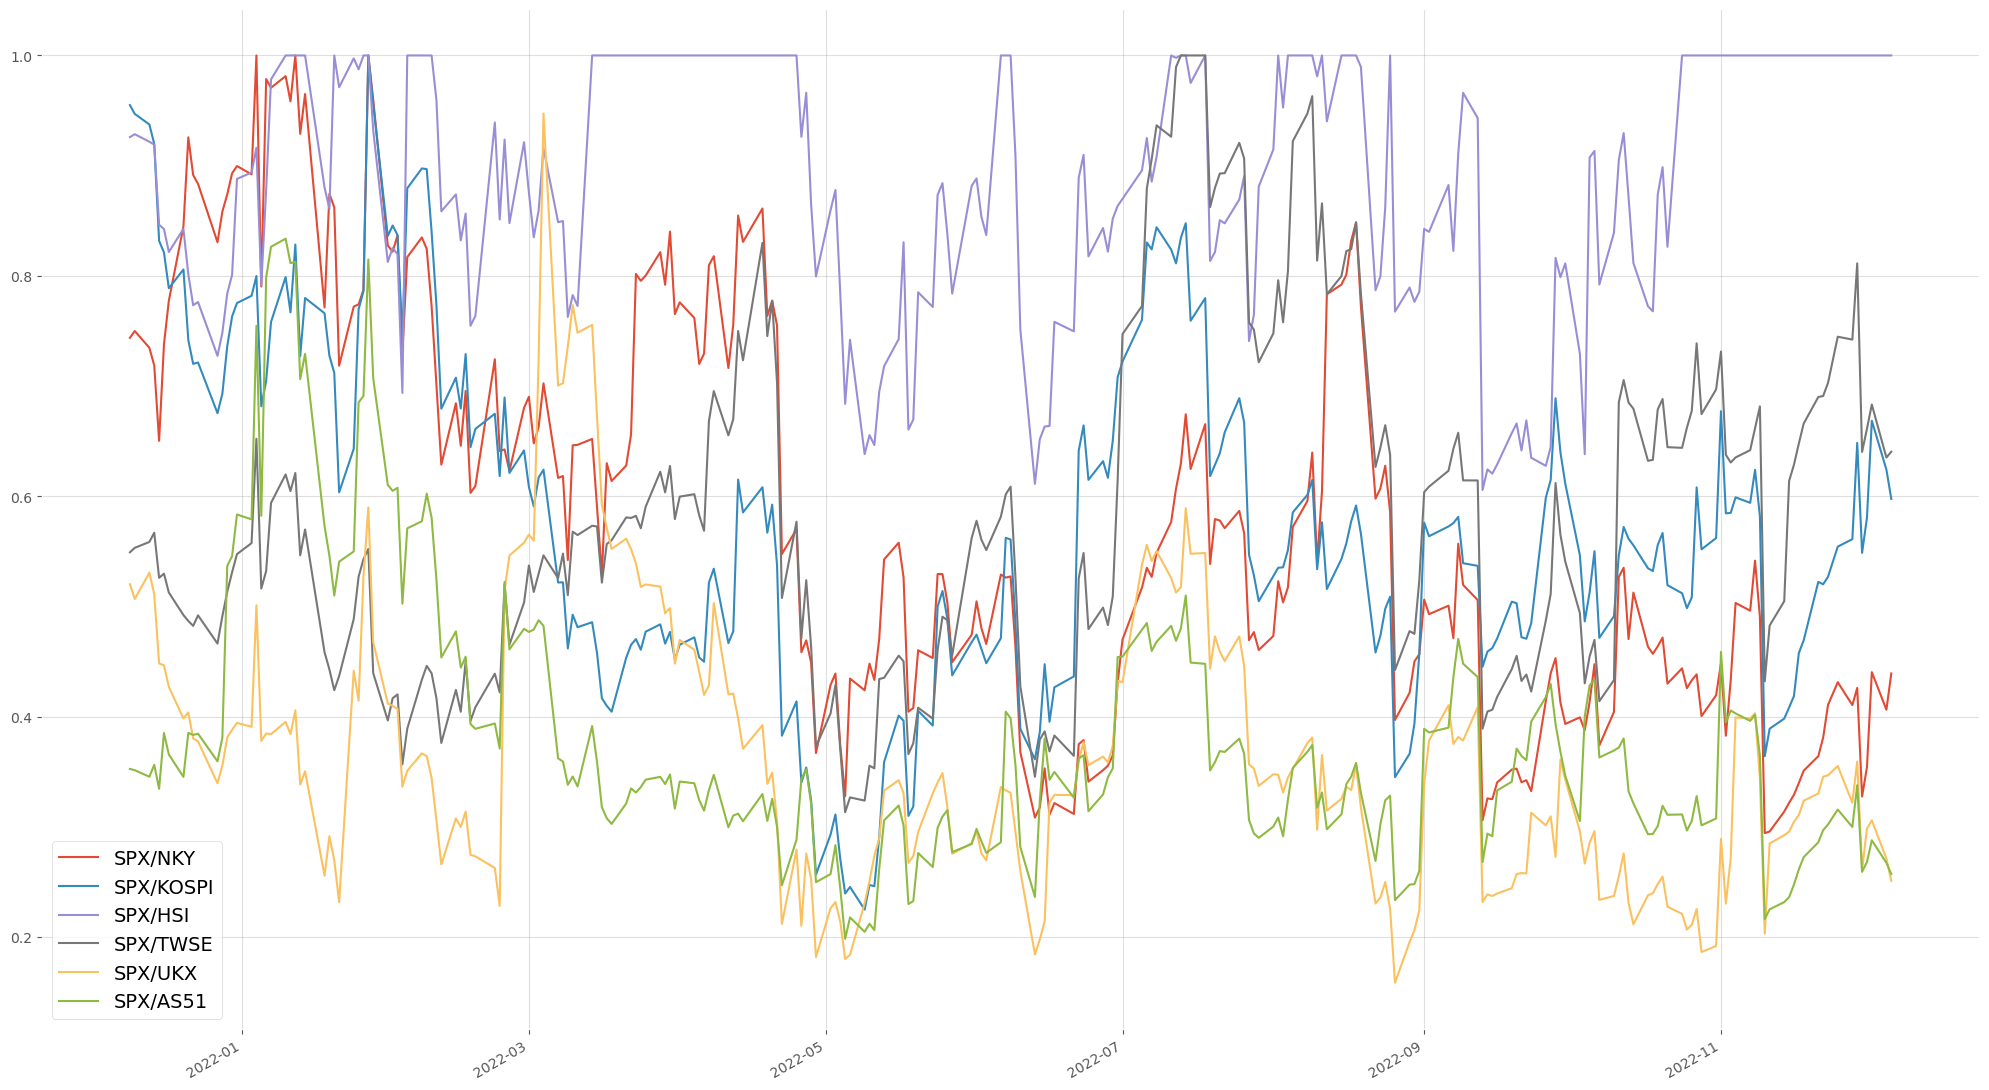

In [22]:
results_weights_df_copy.plot(figsize=(25,15))


## Return Computation Preparation *(using Futures data)*

In [23]:
### using tradable futures data instead of index level (to long/short)

future_raw = pd.read_csv("index_future.csv", index_col=0)
future_raw.index = pd.to_datetime(future_raw.index)
future_raw


,SPX_F,NKY_F,KOSPI_F,HSI_F,TWSE_F,UKX_F,AS51_F
2000-05-02,1450.50,18470.0,94.40,15830.0,15830.0,6429.0,3146.0
2000-05-03,1422.50,18470.0,94.70,15515.0,15515.0,6214.0,3116.0
2000-05-04,1423.25,18470.0,94.60,15240.0,15240.0,6223.0,3077.0
2000-05-05,1439.00,18470.0,94.60,15300.0,15300.0,6270.0,3132.0
2000-05-08,1430.00,18160.0,96.20,14822.0,14822.0,6238.0,3114.0
...,...,...,...,...,...,...,...
2022-12-05,4003.25,27840.0,314.35,19530.0,19530.0,7584.0,7343.0
2022-12-06,3945.00,27860.0,310.15,19510.0,19510.0,7539.0,7292.0
2022-12-07,3936.75,27660.0,308.20,18912.0,18912.0,7510.0,7246.0
2022-12-08,3965.75,27550.0,307.60,19499.0,19499.0,7485.5,7181.0


In [24]:
future_return = np.log(future_raw / future_raw.shift(1)).dropna()
future_return

,SPX_F,NKY_F,KOSPI_F,HSI_F,TWSE_F,UKX_F,AS51_F
2000-05-03,-0.019492,0.000000,0.003173,-0.020100,-0.020100,-0.034014,-0.009582
2000-05-04,0.000527,0.000000,-0.001057,-0.017884,-0.017884,0.001447,-0.012595
2000-05-05,0.011005,0.000000,0.000000,0.003929,0.003929,0.007524,0.017717
2000-05-08,-0.006274,-0.016926,0.016772,-0.031740,-0.031740,-0.005117,-0.005764
2000-05-09,-0.007194,-0.020023,-0.006257,-0.003514,-0.003514,-0.014777,-0.009356
...,...,...,...,...,...,...,...
2022-12-05,-0.017887,0.002878,-0.002066,0.039692,0.039692,0.001848,0.003820
2022-12-06,-0.014658,0.000718,-0.013451,-0.001025,-0.001025,-0.005951,-0.006970
2022-12-07,-0.002093,-0.007205,-0.006307,-0.031131,-0.031131,-0.003854,-0.006328
2022-12-08,0.007339,-0.003985,-0.001949,0.030567,0.030567,-0.003268,-0.009011


In [25]:
### Computing returns
### trading period from 2021-12-10 to 2022-12-06
### strategy(t) was made based on closing price(t)
### thus, strategy(t) is executed(t+1) and its return should be (t+1) <non-biased>

start_date = results_weights_df.index[0]
end_date = results_weights_df.index[-1]

dated_future_return = future_return[future_return.index.isin(pd.date_range(start_date, end_date))]
dated_future_return

,SPX_F,NKY_F,KOSPI_F,HSI_F,TWSE_F,UKX_F,AS51_F
2021-12-09,-0.006833,-0.004858,0.002883,0.006230,0.006230,-0.002320,-0.005272
2021-12-10,0.009384,-0.012953,-0.016154,-0.007272,-0.007272,-0.003352,-0.003394
2021-12-13,-0.009009,0.009469,0.002287,0.001625,0.001625,-0.008189,0.003665
2021-12-14,-0.006824,-0.010879,-0.008797,-0.017600,-0.017600,-0.001590,0.000000
2021-12-15,0.015514,0.004577,0.001024,-0.008554,-0.008554,-0.006735,-0.009120
...,...,...,...,...,...,...,...
2022-11-30,0.029654,-0.000713,0.012434,0.038828,0.038828,0.009520,0.006727
2022-12-01,0.000123,0.007461,0.010735,0.009569,0.009569,-0.004220,0.007768
2022-12-02,-0.001532,-0.017497,-0.025389,-0.001384,-0.001384,0.000396,-0.006948
2022-12-05,-0.017887,0.002878,-0.002066,0.039692,0.039692,0.001848,0.003820


## Mean Weight Portfolio Return (2021-12-10 to 2022-12-06)

In [26]:
# pnl for $1 long only SPX from 2021-12-10 to 2022-12-06

SPX_return = dated_future_return[dated_future_return.columns[0]].cumsum()[-1]
SPX_return

-0.17490076582284114

In [27]:
### Using [mean] weight portfolio
### 2021-12-10 to 2022-12-06

results_hedged_return = [SPX_return]
col_list_hedged_return = ["SPX_F / -"]

for i in range(1, len(D_t.columns)):
    return_SPX = SPX_return
    return_pair = dated_future_return[dated_future_return.columns[i]].cumsum()[-1]
    weight_SPX = results_weights_df.mean()["W1"+str(i+1)]
    weight_pair = 1 - weight_SPX
    hedged_return = (return_SPX * weight_SPX) - (return_pair * weight_pair)
    
    results_hedged_return.append(hedged_return)
    col = dated_future_return.columns[0] + " / " + dated_future_return.columns[i]
    col_list_hedged_return.append(col)
    
    results_hedged_return_df = pd.DataFrame(results_hedged_return).T
    results_hedged_return_df.columns = col_list_hedged_return
    
((np.exp(results_hedged_return_df)-1)*100).round(4) # percentage return

,SPX_F / -,SPX_F / NKY_F,SPX_F / KOSPI_F,SPX_F / HSI_F,SPX_F / TWSE_F,SPX_F / UKX_F,SPX_F / AS51_F
0,-16.046,-8.2504,0.6017,-12.347,-1.5848,-7.7714,-5.4248


## Monthly Rebalancing Weight Portfolio Return (2022-01-03* to 2022-12-06)

In [28]:
### Rebalancing - monthly

rebal_weight = results_weights_df.copy()
rebal_weight = rebal_weight.reset_index().rename(columns={'index': 'Date'})
rebal_weight = rebal_weight.loc[rebal_weight.groupby(pd.Grouper(key='Date', freq='1M')).Date.idxmax()]
rebal_weight

,Date,W12,W13,W14,W15,W16,W17
15,2021-12-31,0.899625,0.775317,0.887935,0.547420,0.394311,0.583433
35,2022-01-31,0.827522,0.836190,0.812621,0.396494,0.411863,0.610286
54,2022-02-28,0.680184,0.641535,0.921282,0.503491,0.557848,0.479656
77,2022-03-31,0.765268,0.451774,1.000000,0.579252,0.448082,0.316542
97,2022-04-29,0.366926,0.256638,0.799478,0.372783,0.181900,0.249748
118,2022-05-31,0.474231,0.467581,0.881725,0.562038,0.285200,0.284375
139,2022-06-30,0.430784,0.707917,0.863431,0.614477,0.432628,0.454044
159,2022-07-29,0.460426,0.504729,0.881039,0.721585,0.337127,0.289997
182,2022-08-31,0.456565,0.457510,0.785553,0.523738,0.224415,0.260028
203,2022-09-30,0.393342,0.611363,0.811218,0.540640,0.342790,0.346333


In [29]:
# Total trading days

len(rebal_weight)-1 # excluding a trade on last day

12

In [30]:
### Using [monthly rebalancing] weight portfolio 
### (trades executed on every 1st good biz day of a month)
### 2022-01-01 to 2022-12-06
### Total execution number = 12 times (Jan to Dec)

results_rebal_hedged_return = []
col_list_rebal_hedged_return = []
col_list = dated_future_return.columns
rebal_weight['W11'] = 1
rebal_df = rebal_weight.copy().set_index('Date')

for i in range(0, len(D_t.columns)):
    
    df = dated_future_return.reset_index().rename(columns={'index': 'Date'})
    df[col_list[i]+"_cum"] = df.groupby(pd.Grouper(key='Date', freq='1M'))[col_list[i]].cumsum()
    df = df.set_index('Date')
    rebal_df = rebal_df.join(df[col_list[i]+"_cum"])

    return_SPX = rebal_df['SPX_F_cum']
    return_pair = rebal_df[col_list[i]+"_cum"]
    weight_SPX = rebal_df["W1"+str(i+1)]
    weight_pair = 1 - weight_SPX
    hedged_return = ((return_SPX * weight_SPX.shift(1)) - (return_pair * weight_pair.shift(1))).cumsum()[-1]
        
    results_rebal_hedged_return.append(hedged_return)
    col = col_list[0] + " / " + col_list[i]
    col_list_rebal_hedged_return.append(col)
    
    results_rebal_hedged_return_df = pd.DataFrame(results_rebal_hedged_return).T
    results_rebal_hedged_return_df.columns = col_list_rebal_hedged_return
    
results_rebal_hedged_return_df = ((np.exp(results_rebal_hedged_return_df)-1)*100).round(4)
results_rebal_hedged_return_df = results_rebal_hedged_return_df.rename(columns={'SPX_F / SPX_F':'SPX_F / -'})
results_rebal_hedged_return_df # percentage return

,SPX_F / -,SPX_F / NKY_F,SPX_F / KOSPI_F,SPX_F / HSI_F,SPX_F / TWSE_F,SPX_F / UKX_F,SPX_F / AS51_F
0,-17.0957,-15.7938,5.6861,-8.7304,2.5607,-6.3938,-2.9337
